<h1 style="color:Tomato; font-size: 8em; font-weight: bold;"><center>FACTS | FAKES</h1>
<center><img src='facts_or_fake.png' width="500" height="600" style="vertical-align:middle"></center>
<p>
Nowadays, people can easily access endless news platforms thanks to technological advancement and the popularity of 4G networks. However, have we considered the possibility that a piece of news can have completely different versions? I think this has a lot to do with fake news, which has led to social unrest in many parts of the world. 
</p>

## 1. Import Libary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Used to get known data inside zipfile 
import zipfile as zf


# Natural Language Toolkit
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
from bs4 import BeautifulSoup


import wordcloud
from wordcloud import WordCloud,STOPWORDS
from string import punctuation
import string

## 2. Reading Data From Zipfile

In [2]:
# Reading Zipfile and Print the data inside Zipfile
with zf.ZipFile('httpswww.kaggle.comdatasetsclmentbisaillonfake-and-real-news-datasetselect=True.csv.zip', 'r') as raw_data:
    raw_data.printdir()
    # Reading fake news, in Fake.csv
    with raw_data.open('Fake.csv') as fake_df:
        fake_data = pd.read_csv(fake_df)
    # Reading Not fake news, in True.csv
    with raw_data.open('True.csv') as true_df:
        true_data = pd.read_csv(true_df)


File Name                                             Modified             Size
Fake.csv                                       2020-03-26 18:51:22     62789876
True.csv                                       2020-03-26 18:51:30     53582940


## 3. Exploring Data

In [3]:
# Exploring data
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
print("Fake News in dataset has rows and columns", fake_data.shape)
print("True News in dataset has rows and columns", true_data.shape)

Fake News in dataset has rows and columns (23481, 4)
True News in dataset has rows and columns (21417, 4)


In [6]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
fake_data.date.unique()

array(['December 31, 2017', 'December 30, 2017', 'December 29, 2017', ...,
       'December 18, 2017', 'December 14, 2017', 'December 8, 2017'],
      dtype=object)

In [9]:
print('What are subjects in True News ?',true_data.subject.unique())
print('What are subjects in Fake News ?',fake_data.subject.unique())

What are subjects in True News ? ['politicsNews' 'worldnews']
What are subjects in Fake News ? ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east']


In [10]:
fake_data.title[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [11]:
fake_data.text[0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [12]:
true_data.title[0]

'As U.S. budget fight looms, Republicans flip their fiscal script'

In [13]:
true_data.text[0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [14]:
fake_data['category'] = 0
true_data['category'] = 1

In [15]:
# Merge 2 datasets become one dataset
news_data = pd.concat([fake_data, true_data]).reset_index(drop=True)
news_data.shape

(44898, 5)

In [16]:
news_data.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
# Chechk if there any empty emails (string length zero)
(news_data['text'].str.len() == 0).any()

False

<AxesSubplot:xlabel='category', ylabel='count'>

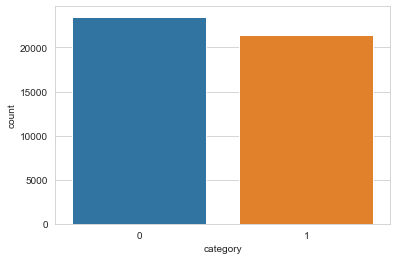

In [18]:
sns.set_style(style="whitegrid")
sns.countplot(x=news_data.category)

<AxesSubplot:xlabel='subject', ylabel='count'>

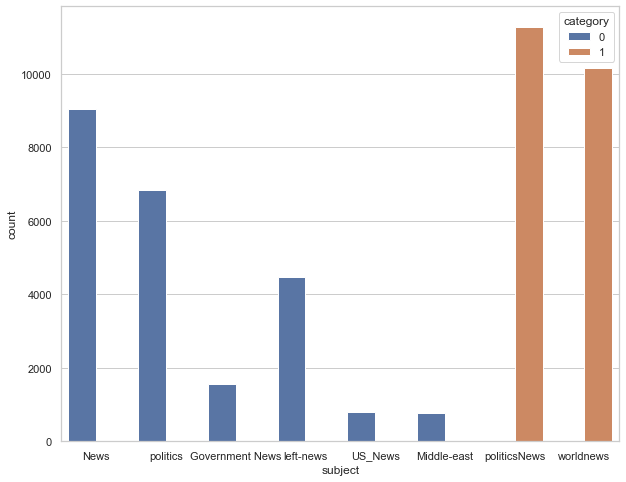

In [19]:
plt.figure(figsize=(10,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=news_data.subject, hue=news_data.category)

In [20]:
news_data.category.value_counts()

0    23481
1    21417
Name: category, dtype: int64

In [21]:
amount_of_fake = news_data.category.value_counts()[0]
amount_of_fact = news_data.category.value_counts()[1]

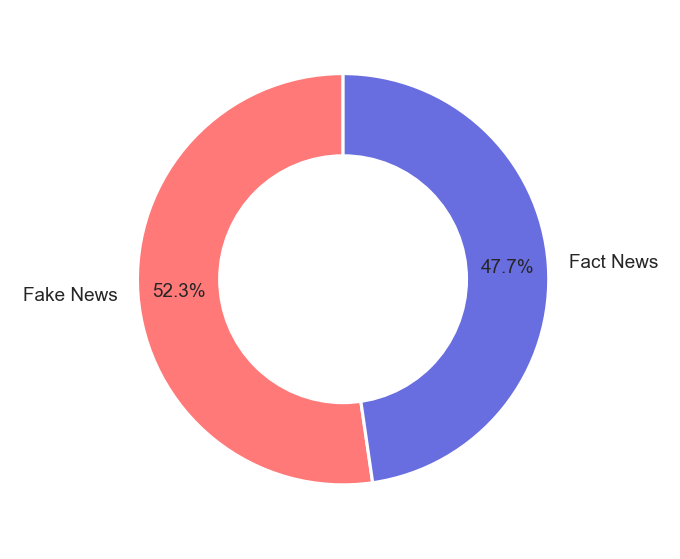

In [22]:
category_names = ['Fake News', 'Fact News']
sizes = [amount_of_fake, amount_of_fact]
custom_colors = ['#ff7979', '#686de0']
plt.figure(figsize=(3, 3), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize':6}, startangle=90,
       autopct='%1.1f%%', colors=custom_colors, pctdistance=0.8)

# drawing circle
center_circle = plt.Circle((0,0), radius=0.6, fc='white')
plt.gca().add_artist(center_circle)
plt.show()

## Natural Langueage Processing

In [23]:
news_data['combine_text'] = news_data['title'] + " " + news_data['text']
del news_data['title']
del news_data['subject']
del news_data['date']
del news_data['text']

In [24]:
news_data

,category,combine_text
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
44893,1,'Fully committed' NATO backs new U.S. approach...
44894,1,LexisNexis withdrew two products from Chinese ...
44895,1,Minsk cultural hub becomes haven from authorit...
44896,1,Vatican upbeat on possibility of Pope Francis ...


In [25]:
news_data.combine_text[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [26]:
# Download Punktuiton
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# Download stopwords

nltk.download('stopwords')
# Set stop word in english
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [29]:
# words = news_data['combine_text'][0]
# filtered_word = []
# for word in words:
#     if word not in stop_words:
#         filtered_word.append(word)
        
# print(filtered_word)

In [30]:
def count_twitter_user(df):
    twitter_username = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    list_user = []
    for text in df['text']:
        count += len(re.findall(twitter_username,text))
    return count

In [31]:
twitter_username_on_fake_news = count_twitter_user(fake_data)
twitter_username_on_truth_news = count_twitter_user(true_data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x576 with 0 Axes>

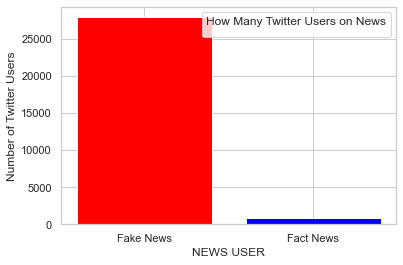

In [32]:
plt.figure(figsize=(10,8))

fig, ax = plt.subplots()

categoty_news = ['Fake', 'Facts']
counts = [twitter_username_on_fake_news, twitter_username_on_truth_news]
ax.bar(category_names, counts, color=['red','blue'])
ax.set_xlabel('NEWS USER')
ax.set_ylabel("Number of Twitter Users")
ax.legend(title='How Many Twitter Users on News')

plt.show()

In [33]:
#function which stop words and the words less than 2 characters
import gensim

def remove_stop_words (text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [34]:
#remove stopwords from news column
news_data['clean_news'] = news_data['combine_text'].apply(remove_stop_words)

In [35]:
# def strip_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()

# #Removing the square brackets
# def remove_between_square_brackets(text):
#     return re.sub('\[[^]]*\]', '', text)
# # Removing URL's
# def remove_between_square_brackets(text):
#     return re.sub(r'http\S+', '', text)
    
# #Removing the stopwords from text
# def remove_stopwords(text):
#     final_text = []
#     for i in text.split():
#         if i.strip().lower() not in stop_words:
#             final_text.append(i.strip())
#     return " ".join(final_text)

# #Removing the noisy text
# def denoise_text(text):
#     text = strip_html(text)
#     text = remove_between_square_brackets(text)
#     text = remove_stopwords(text)
#     return text


# #Apply function on review column
# news_data['combine_text']=news_data['combine_text'].apply(denoise_text)

In [36]:
print(news_data.clean_news[0])

['donald', 'trump', 'sends', 'embarrassing', 'year', 'message', 'disturbing', 'donald', 'trump', 'wish', 'americans', 'happy', 'year', 'leave', 'instead', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'reality', 'star', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'year', 'president', 'angry', 'pants', 'tweeted', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'year', 'great', 'year', 'america', 'donald', 'trump', 'realdonaldtrump', 'december', 'trump', 'tweet', 'went', 'welll', 'expect', 'kind', 'president', 'sends', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'allow', 'rise', 'gutter', 'long', 'wish', 'american', 'citizens',

In [37]:
# plt.figure(figsize = (20,20)) # Text that is not Fake
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news_data[news_data.category == 1].combine_text))
# plt.imshow(wc , interpolation = 'bilinear')

In [38]:

# # words = news_data.combine_text

# stemmer = PorterStemmer()
# def cleaner_msg_no_html(text, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):

#     # Cleaning text from link and HTML
#     soup = BeautifulSoup(text, 'html.parser')
#     cleaned_text = soup.get_text()
#     words = word_tokenize(cleaned_text.lower())
#     filtered_word = []
#     for word in cleaned_text:
#         if word not in stop_words and word.isalpha():
#             filtered_word.append(stemmer.stem(word.strip()))
            
#     return filtered_word

In [39]:
# news_data['combine_text']=news_data['combine_text'].apply(cleaner_msg_no_html)
# news_data.combine_text[0]

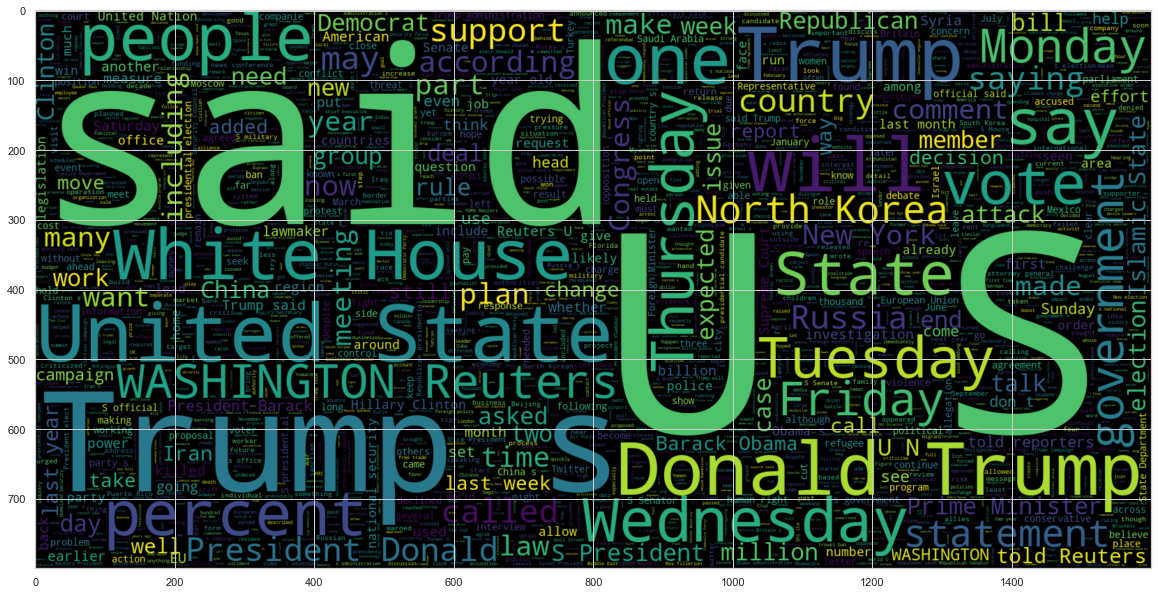

In [40]:
# Created Word Cloud
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news_data[news_data.category == 1].combine_text))
plt.imshow(wc , interpolation = 'bilinear')

In [41]:
news_data

,category,combine_text,clean_news
0,0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, sends, embarrassing, year, mes..."
1,0,Drunk Bragging Trump Staffer Started Russian ...,"[drunk, bragging, trump, staffer, started, rus..."
2,0,Sheriff David Clarke Becomes An Internet Joke...,"[sheriff, david, clarke, internet, joke, threa..."
3,0,Trump Is So Obsessed He Even Has Obama’s Name...,"[trump, obsessed, obama, coded, website, image..."
4,0,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, called, donald, trump, christm..."
...,...,...,...
44893,1,'Fully committed' NATO backs new U.S. approach...,"[fully, committed, nato, backs, approach, afgh..."
44894,1,LexisNexis withdrew two products from Chinese ...,"[lexisnexis, withdrew, products, chinese, mark..."
44895,1,Minsk cultural hub becomes haven from authorit...,"[minsk, cultural, authorities, minsk, reuters,..."
44896,1,Vatican upbeat on possibility of Pope Francis ...,"[vatican, upbeat, possibility, pope, francis, ..."


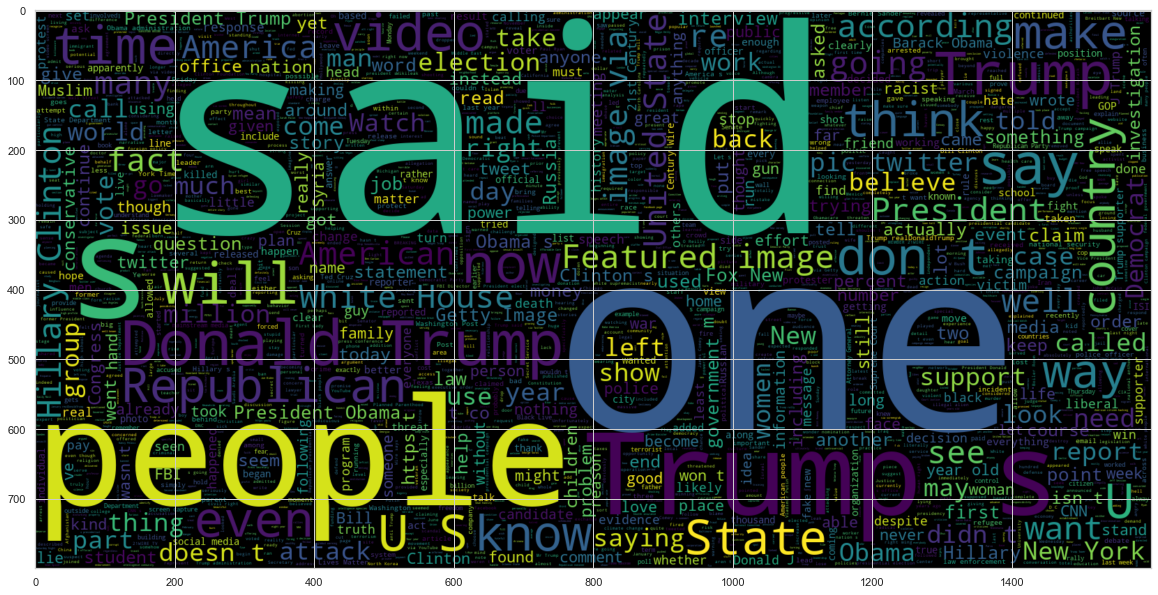

In [42]:
# Created Word Cloud
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(news_data[news_data.category == 0].combine_text))
plt.imshow(wc , interpolation = 'bilinear')

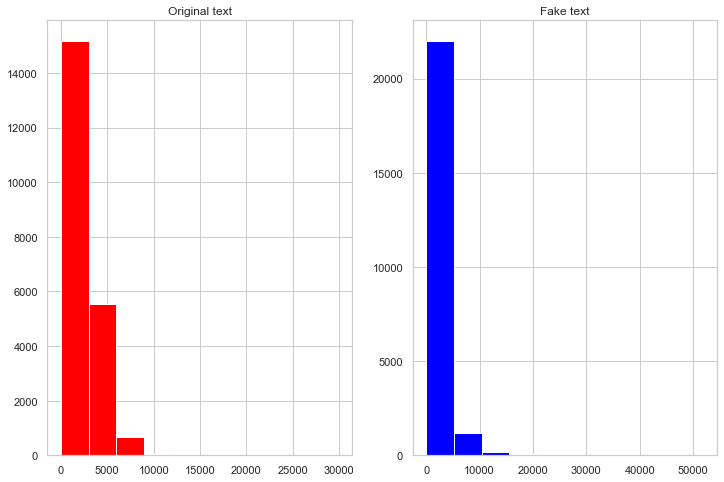

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,8))

text_len = news_data[news_data.category == 1]['combine_text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len = news_data[news_data.category == 0]['combine_text'].str.len()
ax2.hist(text_len,color='blue')
ax2.set_title('Fake text')
plt.show()

C:\Users\bayu\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\bayu\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Average word length in each text')

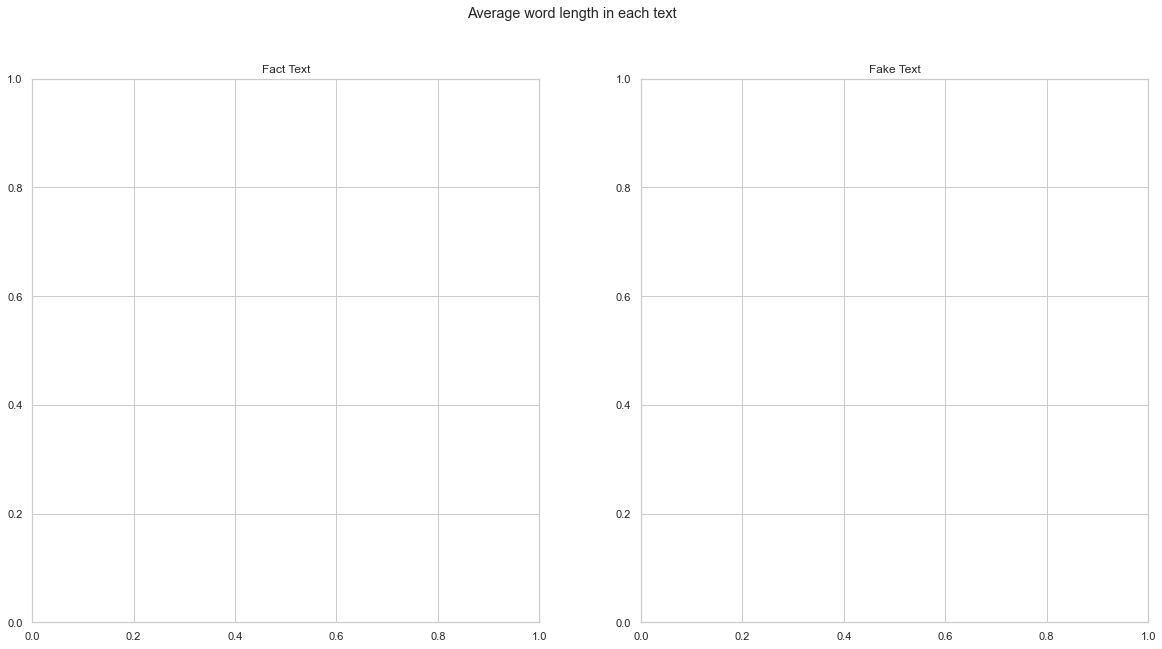

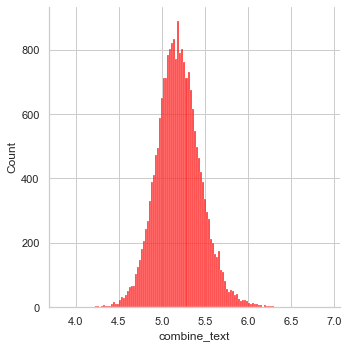

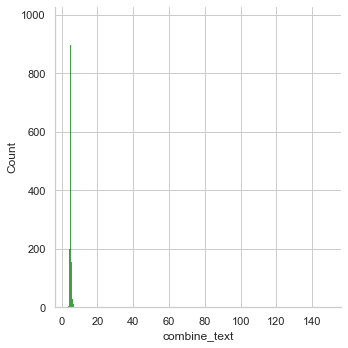

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

word = news_data[news_data['category']==1]['combine_text'].str.split().apply(lambda x: [len(i) for i in x])
sns.displot(word.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title('Fact Text')

word = news_data[news_data['category']==0]['combine_text'].str.split().apply(lambda x: [len(i) for i in x])
sns.displot(word.map(lambda x: np.mean(x)), ax=ax2, color='green')
ax2.set_title('Fake Text')

fig.suptitle('Average word length in each text')

In [45]:
#creating a list of words
list_of_words = []
for i in news_data.clean_news:
    for j in i:
        list_of_words.append(j)

In [46]:
#Total unique words
#finding the number of unique_words is needed to building the LSTM model
unique_words = len(list(set(list_of_words)))
unique_words

108705

In [47]:
#turn list of words to a string
news_data['clean_news_joined'] = news_data['clean_news'].apply(lambda x: " ".join(x))
news_data.drop(columns = ['clean_news', 'combine_text'], inplace = True)

In [48]:
news_data

,category,clean_news_joined
0,0,donald trump sends embarrassing year message d...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke internet joke threatening...
3,0,trump obsessed obama coded website images chri...
4,0,pope francis called donald trump christmas spe...
...,...,...
44893,1,fully committed nato backs approach afghanista...
44894,1,lexisnexis withdrew products chinese market lo...
44895,1,minsk cultural authorities minsk reuters shado...
44896,1,vatican upbeat possibility pope francis visiti...


In [49]:
# def get_corpus(text):
#     words = []
#     for i in text:
#         for j in i.split():
#             words.append(j.strip())
#         return words

# corpus = get_corpus(news_data.combine_text)
# corpus[:5]

In [50]:
# from collections import Counter

# counter = Counter(corpus)
# most_common =  counter.most_common(50)
# most_common = dict(most_common)
# most_common

In [51]:
# from sklearn.feature_extraction.text import CountVectorizer
# def get_top_text_ngrams(corpus, n, g):
#     vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
#     bag_of_words = vec.transform(corpus)
#     sum_words = bag_of_words.sum(axis=0) 
#     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#     return words_freq[:n]

In [52]:
# plt.figure(figsize = (16,9))
# most_common_uni = get_top_text_ngrams(news_data.combine_text,10,1)
# most_common_uni = dict(most_common_uni)
# sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [53]:
maxlen = -1
for doc in news_data.clean_news_joined:
    tokens = nltk.word_tokenize(doc)
    if (maxlen < len(tokens)):
        maxlen = len(tokens)

print("The maximum number of words in a news is ", maxlen)

The maximum number of words in a news is  4405


In [54]:
from matplotlib import test
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(news_data.clean_news_joined,news_data.category,random_state = 0, test_size=0.2)

In [55]:
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras_preprocessing.sequence import pad_sequences

tokenizer = text.Tokenizer(num_words=unique_words)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = tf.keras.utils.pad_sequences(tokenized_train, maxlen=4406)

In [56]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = tf.keras.utils.pad_sequences(tokenized_test, maxlen=4406)

In [57]:
# batch_size = 256
# epochs = 10
# embed_size = 256

In [58]:
# from keras.callbacks import ReduceLROnPlateau

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from requests import options

# #Defining Neural Network
# model = Sequential()
# #Non-trainable embeddidng layer
# model.add(Embedding(unique_words, output_dim=embed_size, input_length=maxlen, trainable=False))
# #LSTM 
# model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
# model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
# model.add(Dense(units = 32 , activation = 'relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

def LSTM_model():
    model = Sequential()
    model.add(Embedding(unique_words, output_dim = 256)),
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['acc'])

    return model

In [60]:
model = LSTM_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         27828480  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              394240    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 28,263,937
Trainable params: 28,263,937
Non-trainable params: 0
____________________________________________

In [61]:
y_train = np.asarray(y_train)

In [62]:
#model training
model.fit(x_train, y_train, batch_size = 16, validation_split = 0.1, epochs = 2)

Epoch 1/2
2021/2021 [==============================] - 965s 475ms/step - loss: 0.1652 - acc: 0.9379 - val_loss: 0.0565 - val_acc: 0.9816
Epoch 2/2
2021/2021 [==============================] - 961s 475ms/step - loss: 0.0814 - acc: 0.9720 - val_loss: 0.0595 - val_acc: 0.9786


In [68]:
#prediction
predicted_result = model.predict(X_test)

281/281 [==============================] - 82s 288ms/step


In [69]:
#if predicted value > 0.5 its real else fake
prediction = []
for i in range (len(predicted_result)):
    if predicted_result[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [70]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test), prediction)

print(accuracy)

0.9766146993318485


<AxesSubplot:>

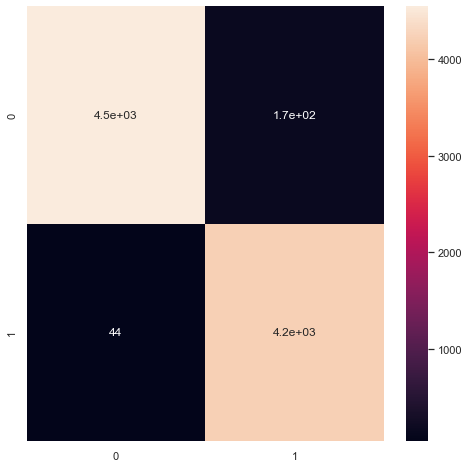

In [71]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True)